In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('datasets/deliveries.csv')

In [178]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [82]:
a = data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False)
a.to_csv('batsmans.csv',index=False)

In [31]:
a = a.iloc[:10]

In [32]:
a

,batsman,batsman_runs
374,SK Raina,4548
431,V Kohli,4423
323,RG Sharma,4207
137,G Gambhir,4132
103,DA Warner,4014
340,RV Uthappa,3778
85,CH Gayle,3651
347,S Dhawan,3561
259,MS Dhoni,3560
22,AB de Villiers,3486


In [45]:
df = pd.DataFrame(a,index=['batsman'],columns=pd.Index(['batsman_runs']))

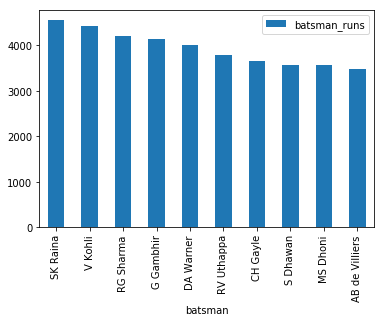

In [53]:
a.plot.bar(x='batsman')

In [48]:
a['batsman']

374          SK Raina
431           V Kohli
323         RG Sharma
137         G Gambhir
103         DA Warner
340        RV Uthappa
85           CH Gayle
347          S Dhawan
259          MS Dhoni
22     AB de Villiers
Name: batsman, dtype: object

In [81]:
c = data.groupby('bowler')['player_dismissed'].agg('count').reset_index().sort_values(by='player_dismissed',ascending=False)
c.to_csv('bowler.csv',index=False)

In [62]:
c = c.iloc[:10]

In [63]:
c

,bowler,player_dismissed
294,SL Malinga,170
5,A Mishra,142
88,DJ Bravo,137
117,Harbhajan Singh,136
229,PP Chawla,133
244,R Vinay Kumar,125
7,A Nehra,121
355,Z Khan,119
50,B Kumar,117
234,R Ashwin,110


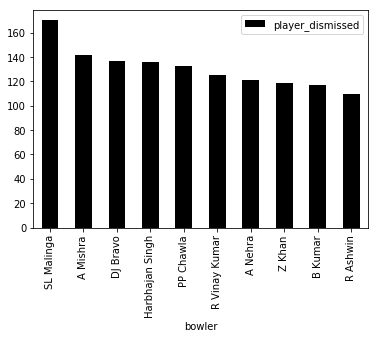

In [66]:
c.plot.bar(x='bowler',color='k')

In [74]:
d = data.groupby('bowling_team')['total_runs'].agg('sum').reset_index().sort_values(by='total_runs',ascending=False)

In [75]:
d

,bowling_team,total_runs
7,Mumbai Indians,23835
12,Royal Challengers Bangalore,23622
4,Kings XI Punjab,23270
2,Delhi Daredevils,22343
6,Kolkata Knight Riders,22035
0,Chennai Super Kings,19790
9,Rajasthan Royals,17854
1,Deccan Chargers,11618
13,Sunrisers Hyderabad,11465
8,Pune Warriors,6857


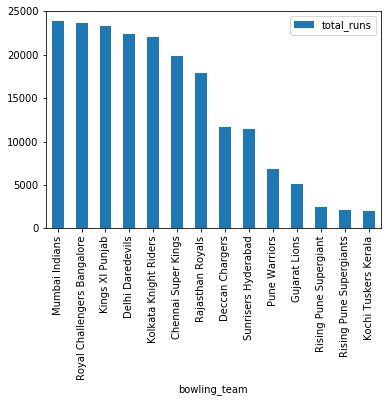

In [77]:
d.plot.bar(x='bowling_team')

In [78]:
e = data.groupby('bowling_team')['extra_runs'].agg('sum').reset_index().sort_values(by='extra_runs',ascending=False)

In [79]:
e

,bowling_team,extra_runs
7,Mumbai Indians,1397
12,Royal Challengers Bangalore,1309
4,Kings XI Punjab,1230
6,Kolkata Knight Riders,1204
2,Delhi Daredevils,1187
9,Rajasthan Royals,1058
0,Chennai Super Kings,1002
1,Deccan Chargers,659
13,Sunrisers Hyderabad,487
8,Pune Warriors,335


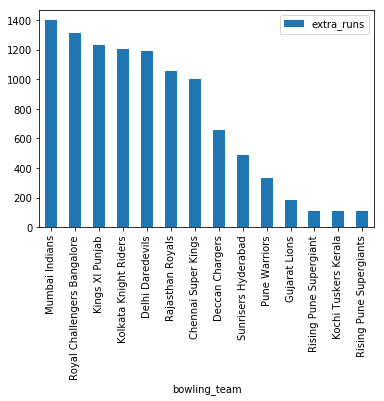

In [80]:
e.plot.bar(x='bowling_team')

In [83]:
f = pd.merge(d,e,on='bowling_team',how='outer')

In [84]:
f

,bowling_team,total_runs,extra_runs
0,Mumbai Indians,23835,1397
1,Royal Challengers Bangalore,23622,1309
2,Kings XI Punjab,23270,1230
3,Delhi Daredevils,22343,1187
4,Kolkata Knight Riders,22035,1204
5,Chennai Super Kings,19790,1002
6,Rajasthan Royals,17854,1058
7,Deccan Chargers,11618,659
8,Sunrisers Hyderabad,11465,487
9,Pune Warriors,6857,335


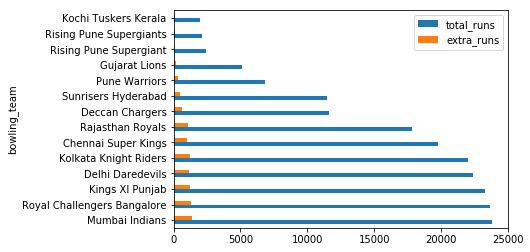

In [86]:
f.plot.barh(x='bowling_team')

In [140]:
g = data.groupby(['fielder'])[('fielder')].agg('count').sort_values(ascending=False)


In [134]:
h

In [142]:
g=g.iloc[:10]

In [143]:
g

fielder
KD Karthik        127
MS Dhoni          126
RV Uthappa        115
AB de Villiers    101
SK Raina           96
PA Patel           84
NV Ojha            82
RG Sharma          79
AC Gilchrist       75
V Kohli            74
Name: fielder, dtype: int64

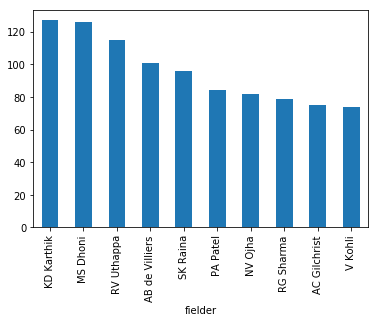

In [146]:
g.plot.bar(x='fielder')

In [147]:
h = data.groupby(['player_dismissed'])[('player_dismissed')].agg('count').sort_values(ascending=False)

In [149]:
h=h.iloc[:10]

In [150]:
h

player_dismissed
SK Raina        134
G Gambhir       131
RG Sharma       129
RV Uthappa      128
V Kohli         118
KD Karthik      117
S Dhawan        109
PA Patel        107
Yuvraj Singh    101
DA Warner       100
Name: player_dismissed, dtype: int64

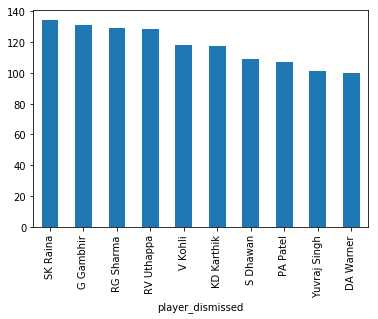

In [151]:
h.plot.bar(x='player_dismissed')

In [158]:
i = data.groupby(['bowler'])[('wide_runs')].agg('sum').sort_values(ascending=False)

In [26]:
i.head()

bowler
Harbhajan Singh    2989
A Mishra           2703
SL Malinga         2694
P Kumar            2637
PP Chawla          2594
Name: is_super_over, dtype: int64

In [5]:
j = data.groupby(['bowler'])[('total_runs')].agg('sum').sort_values(ascending=False)

In [27]:
j.head()

bowler
P Kumar       144
SL Malinga    143
DW Steyn      105
DJ Bravo       93
SR Watson      90
Name: wide_runs, dtype: int64

In [30]:
h = data.groupby(['bowler'])[('extra_runs')].agg('sum').sort_values(ascending=False)

In [31]:
h1=h.reset_index()
h1.to_csv('bol_extra.csv',index=False)

In [32]:
h = data.groupby(['bowler'])[('noball_runs')].agg('sum').sort_values(ascending=False)

In [33]:
h1=h.reset_index()
h1.to_csv('bol_nb.csv',index=False)

In [12]:
i =data.groupby(['bowler'])[('is_super_over')].agg('co').sort_values(ascending=False)
i.head()

bowler
Harbhajan Singh    2989
A Mishra           2703
SL Malinga         2694
P Kumar            2637
PP Chawla          2594
Name: is_super_over, dtype: int64

In [34]:
j = data.groupby(['bowler'])[('wide_runs')].agg('sum').sort_values(ascending=False)

In [35]:
j1=j.reset_index()
j1.to_csv('bol_w.csv',index=False)

In [37]:
k = data.groupby(['bowler'])[('over')].agg('count').sort_values(ascending=False)

In [38]:
k.head()

bowler
Harbhajan Singh    2989
A Mishra           2703
SL Malinga         2694
P Kumar            2637
PP Chawla          2594
Name: over, dtype: int64

In [39]:
z = data.groupby('batsman').agg('count').reset_index().sort_values(by='batsman_runs',ascending=False)

In [40]:
z.head()

,batsman,match_id,inning,batting_team,bowling_team,over,ball,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
431,V Kohli,3494,3494,3494,3494,3494,3494,3494,3494,3494,...,3494,3494,3494,3494,3494,3494,3494,126,126,93
137,G Gambhir,3433,3433,3433,3433,3433,3433,3433,3433,3433,...,3433,3433,3433,3433,3433,3433,3433,131,131,94
374,SK Raina,3369,3369,3369,3369,3369,3369,3369,3369,3369,...,3369,3369,3369,3369,3369,3369,3369,133,133,112
323,RG Sharma,3274,3274,3274,3274,3274,3274,3274,3274,3274,...,3274,3274,3274,3274,3274,3274,3274,135,135,101
347,S Dhawan,3005,3005,3005,3005,3005,3005,3005,3005,3005,...,3005,3005,3005,3005,3005,3005,3005,108,108,81


In [54]:
bowl=data.groupby(['match_id','bowler','over'])['total_runs'].sum()
bowl_eco=pd.DataFrame(bowl)

In [55]:
batsman_per_over = bowl_eco.reset_index()
batsman_per_over
batsman_per_over.to_csv("batsman_per_over.csv",index=False)

In [56]:
a = batsman_per_over.groupby(['bowler','over'])['total_runs'].sum()

In [57]:
batsman_per_over

,match_id,bowler,over,total_runs
0,1,A Choudhary,2,16
1,1,A Choudhary,10,4
2,1,A Choudhary,13,18
3,1,A Choudhary,18,17
4,1,A Nehra,1,11
5,1,A Nehra,3,16
6,1,A Nehra,11,13
7,1,A Nehra,18,2
8,1,B Kumar,2,1
9,1,B Kumar,4,15


In [213]:
batsman_per_over.groupby(['match_id','batsman','over'])['total_runs'].max()

match_id  batsman       over
1         A Choudhary   20       6
          BCJ Cutting   19       1
                        20      15
          CH Gayle      1        1
                        2        1
                        3       11
                        4       10
                        5        5
                        7        6
          DA Warner     1        6
                        2       11
          DJ Hooda      16       2
                        17       2
                        18      10
                        19       1
                        20       1
          KM Jadhav     7        0
                        8        5
                        9        9
                        10       7
                        11      11
                        12       2
          MC Henriques  2        4
                        3        4
                        4        2
                        5        7
                        7        2
                        8 

In [214]:
batsman_per_over.head()

,match_id,batsman,over,total_runs
0,1,A Choudhary,20,6
1,1,BCJ Cutting,19,1
2,1,BCJ Cutting,20,15
3,1,CH Gayle,1,1
4,1,CH Gayle,2,1


In [245]:
i = 1
for i in batsman_per_over.columns:
        print(batsman_per_over['over'][3])
            

1
1
1
1


In [217]:
batsman_per_over.dtypes

match_id       int64
batsman       object
over           int64
total_runs     int64
dtype: object

In [223]:
batsman_per_over.batsman

0         A Choudhary
1         BCJ Cutting
2         BCJ Cutting
3            CH Gayle
4            CH Gayle
5            CH Gayle
6            CH Gayle
7            CH Gayle
8            CH Gayle
9           DA Warner
10          DA Warner
11           DJ Hooda
12           DJ Hooda
13           DJ Hooda
14           DJ Hooda
15           DJ Hooda
16          KM Jadhav
17          KM Jadhav
18          KM Jadhav
19          KM Jadhav
20          KM Jadhav
21          KM Jadhav
22       MC Henriques
23       MC Henriques
24       MC Henriques
25       MC Henriques
26       MC Henriques
27       MC Henriques
28       MC Henriques
29       MC Henriques
             ...     
51483        S Dhawan
51484       SR Watson
51485       SR Watson
51486       SR Watson
51487       STR Binny
51488       STR Binny
51489       STR Binny
51490     Sachin Baby
51491     Sachin Baby
51492     Sachin Baby
51493     Sachin Baby
51494     Sachin Baby
51495         V Kohli
51496         V Kohli
51497     

In [246]:
batsman_per_over.groupby(['match_id','batsman','over'])['total_runs'].sum()

match_id  batsman       over
1         A Choudhary   20       6
          BCJ Cutting   19       1
                        20      15
          CH Gayle      1        1
                        2        1
                        3       11
                        4       10
                        5        5
                        7        6
          DA Warner     1        6
                        2       11
          DJ Hooda      16       2
                        17       2
                        18      10
                        19       1
                        20       1
          KM Jadhav     7        0
                        8        5
                        9        9
                        10       7
                        11      11
                        12       2
          MC Henriques  2        4
                        3        4
                        4        2
                        5        7
                        7        2
                        8 

In [251]:
c = batsman_per_over.groupby(batsman_per_over['over'])['total_runs'].sum()

In [248]:
c

over
1      7733
2      8993
3      9852
4     10207
5     10227
6     10397
7      8413
8      8966
9      9247
10     9047
11     9456
12     9694
13     9713
14     9900
15    10240
16    10397
17    10817
18    10899
19    10469
20     9647
Name: total_runs, dtype: int64

In [266]:
dd = batsman_per_over.groupby(['over'])['total_runs'].sum()

In [ ]:
dd['over']

In [12]:
bowl_eco.reset_index(inplace=True)

In [49]:
bowl_eco

total_runs
match_id bowler            over            
1        A Choudhary       2             16
                           10             4
                           13            18
                           18            17
         A Nehra           1             11
                           3             16
                           11            13
                           18             2
         B Kumar           2              1
                           4             15
                           17             3
                           19             9
         BCJ Cutting       5              5
                           9             11
                           16            12
                           20             7
         Bipul Sharma      14             4
         DJ Hooda          7              7
         MC Henriques      10            13
                           12             7
         Rashid Khan       6              6
                           8             13
                           13             8
                           15             9
         S Aravind         5              9
                           12             8
                           15            19
         SR Watson         6             17
                           14             8
                           20            16
...                                     ...
636      BCJ Cutting       16             4
         Bipul Sharma      12             9
                           14             8
         CH Gayle          2              5
                           4              6
                           6             13
         CJ Jordan         10             9
                           12            13
                           17             9
                           19            16
         Iqbal Abdulla     8             10
         MC Henriques      7             10
                           9             21
                           15             9
         Mustafizur Rahman 6              4
                           10            12
                           17            10
                           19            12
         S Aravind         1              7
                           3              9
                           14             7
                           16             7
         SR Watson         5             19
                           11             6
                           18            12
                           20            24
         YS Chahal         7              6
                           9             13
                           13             4
                           15            13

[24405 rows x 1 columns]

In [50]:
bowl_eco.groupby(['match_id','bowler'])['total_runs'].sum()

match_id  bowler           
1         A Choudhary          55
          A Nehra              42
          B Kumar              28
          BCJ Cutting          35
          Bipul Sharma          4
          DJ Hooda              7
          MC Henriques         20
          Rashid Khan          36
          S Aravind            36
          SR Watson            41
          STR Binny            10
          TM Head              11
          TS Mills             32
          YS Chahal            22
2         A Zampa              27
          AB Dinda             58
          BA Stokes            36
          DL Chahar            21
          HH Pandya            37
          Imran Tahir          28
          JJ Bumrah            29
          KA Pollard           30
          KH Pandya            21
          MJ McClenaghan       36
          R Bhatia             14
          TG Southee           34
3         CR Woakes            36
          DR Smith             23
          DS Kulkarn

In [51]:
cc=bowl_eco.groupby(['match_id','bowler','over'])['total_runs'].sum(lambda x:(x==15).sum()).reset_index()

TypeError: f() takes 1 positional argument but 2 were given

In [35]:
cc['over'>'15']

4

In [53]:
bowl_eco

total_runs
match_id bowler            over            
1        A Choudhary       2             16
                           10             4
                           13            18
                           18            17
         A Nehra           1             11
                           3             16
                           11            13
                           18             2
         B Kumar           2              1
                           4             15
                           17             3
                           19             9
         BCJ Cutting       5              5
                           9             11
                           16            12
                           20             7
         Bipul Sharma      14             4
         DJ Hooda          7              7
         MC Henriques      10            13
                           12             7
         Rashid Khan       6              6
                           8             13
                           13             8
                           15             9
         S Aravind         5              9
                           12             8
                           15            19
         SR Watson         6             17
                           14             8
                           20            16
...                                     ...
636      BCJ Cutting       16             4
         Bipul Sharma      12             9
                           14             8
         CH Gayle          2              5
                           4              6
                           6             13
         CJ Jordan         10             9
                           12            13
                           17             9
                           19            16
         Iqbal Abdulla     8             10
         MC Henriques      7             10
                           9             21
                           15             9
         Mustafizur Rahman 6              4
                           10            12
                           17            10
                           19            12
         S Aravind         1              7
                           3              9
                           14             7
                           16             7
         SR Watson         5             19
                           11             6
                           18            12
                           20            24
         YS Chahal         7              6
                           9             13
                           13             4
                           15            13

[24405 rows x 1 columns]

In [58]:
temp_df = batsman_per_over.groupby('bowler')['over'].agg(lambda x: (x>15).sum()).reset_index().sort_values(by='over', ascending=False).reset_index(drop=True)

In [62]:
temp_df.to_csv('bol_de.csv',index=False)

In [84]:
temp_dfs = data.groupby('batsman')['total_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_dfs.to_csv('batsmans_six.csv',index=False)

In [69]:
temp_dfs['total']

,batsman,total_runs
0,CH Gayle,261
1,SK Raina,173
2,RG Sharma,172
3,V Kohli,159
4,DA Warner,157
5,MS Dhoni,156
6,AB de Villiers,155
7,YK Pathan,149
8,KA Pollard,147
9,Yuvraj Singh,141


In [43]:
temp_dfss = data.groupby('batsman')['total_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_dfss.to_csv('batsmans_four.csv',index=False)

In [44]:
temp_dfss

,batsman,total_runs
0,G Gambhir,491
1,S Dhawan,404
2,DA Warner,404
3,SK Raina,401
4,V Kohli,388
5,RV Uthappa,385
6,RG Sharma,354
7,V Sehwag,340
8,AM Rahane,325
9,CH Gayle,306


In [59]:
aa =batsman_per_over.groupby('bowler')['over'].agg(lambda x: (x<7).sum()).reset_index().sort_values(by='over', ascending=False).reset_index(drop=True)

In [61]:
aa.to_csv('bol_pow.csv')

In [66]:
import numpy as np
from sklearn.preprocessing import normalize

x = np.random.rand(1000)*10
norm1 = x / np.linalg.norm(x)
norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
print np.all(norm1 == norm2)

SyntaxError: invalid syntax (<ipython-input-66-03914673ad47>, line 7)